In [1]:
from use_case import TACDataLoader, report_kpis
from use_case import direct_optimization

In [2]:
data_loader = TACDataLoader()
cost_breakdown = data_loader.compute_cost(data_loader.assignment)
data_loader.print_cost_breakdown(cost_breakdown)

initial assignment: [3 3 3 3 3 3 7 7 7 7 7 7 5 4 4 5 1 1 1 1 4 6 4 6 6 6 1 8 1 9 8 8 8 8 9 9 9
 9 9 0 0 0 8 7 7 7 7 7 7 2 2 2 2 8 8 8 8 0 0 0]
Loaded 60 cells, K=10 TACs

=== Cost Breakdown ===
Total Cost:      1386.185034097707
  Paging:        114.48790000000012
  Mobility:      101.4085000000002
    - Adjacency:   154.0
    - Distance:    16.28863409770689



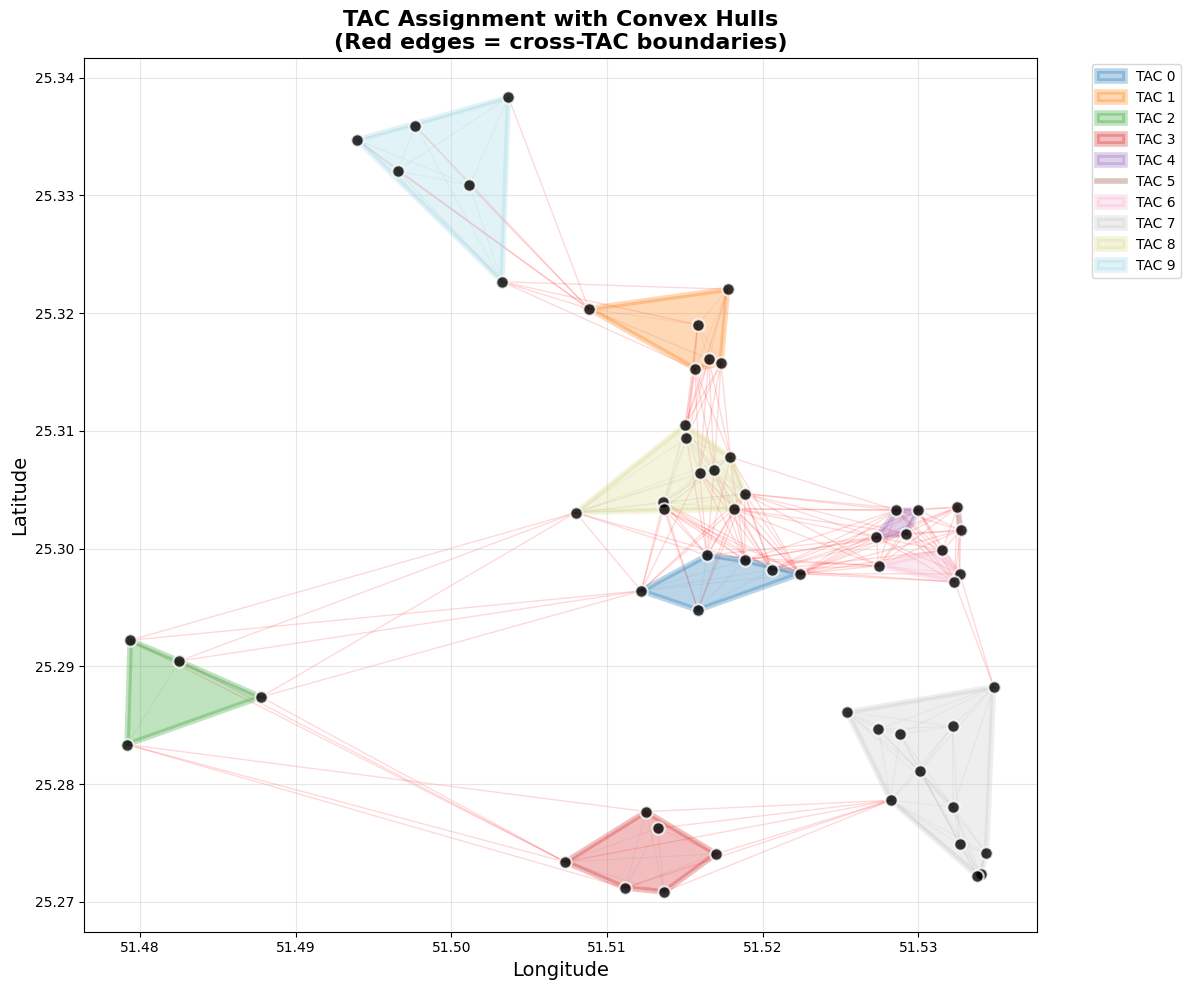

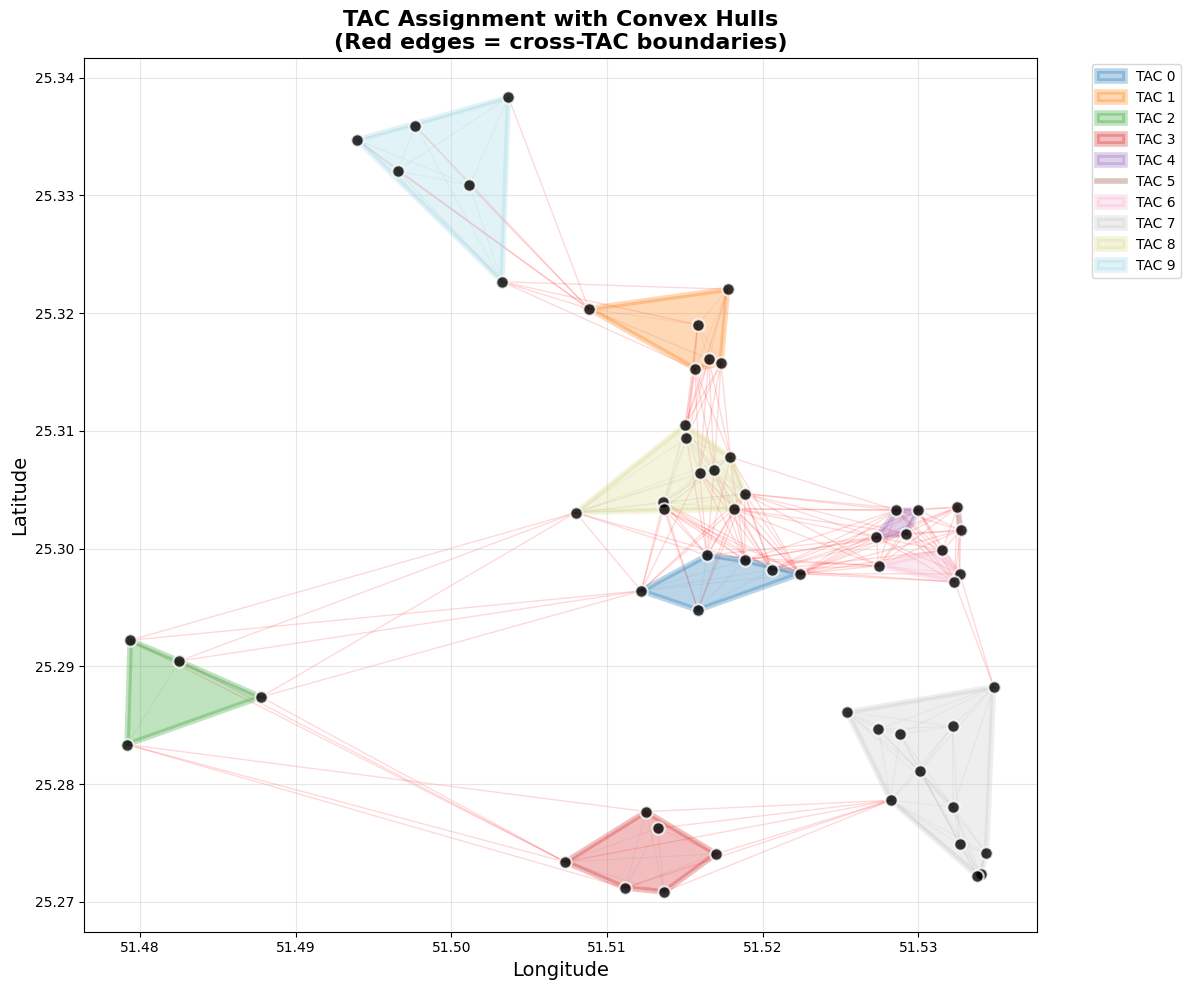

In [3]:
data_loader.plot_tac_assignment()

In [4]:
optimized_results = direct_optimization(data_loader, sc_assign_labels='kmeans')
print(optimized_results)
breakdown = data_loader.compute_cost(optimized_results)
data_loader.print_cost_breakdown(breakdown)


DIRECT COST OPTIMIZATION
Spectral init: total=395.55 paging=119.43 mobility=103.05
Initial cost: 395.55
  Iter 0: best_cost=392.07 paging=118.76 mobility=102.87
  Iter 34: perturbing (stuck at 383.77)
  Iter 44: perturbing (stuck at 383.77)
  Iter 54: perturbing (stuck at 383.77)
  Iter 64: perturbing (stuck at 383.77)
  Iter 74: perturbing (stuck at 383.77)
  Iter 84: perturbing (stuck at 383.77)
  Iter 94: perturbing (stuck at 383.77)

Optimization complete!
Final cost: 383.77
  Paging: 117.40; Mobility: 101.82
[0 0 0 0 0 0 4 4 4 4 4 4 9 6 6 6 8 8 8 8 6 9 6 6 6 9 8 1 8 5 1 1 1 1 5 5 5
 5 5 1 6 3 1 7 7 7 4 4 7 2 2 2 2 1 1 1 1 6 3 3]

=== Cost Breakdown ===
Total Cost:      383.77287208374895
  Paging:        117.39960000000006
  Mobility:      101.82230000000013
    - Adjacency:   150.0
    - Distance:    14.550972083748748



In [5]:
optimized_results = direct_optimization(data_loader, sc_assign_labels='cluster_qr')
print(optimized_results)
breakdown = data_loader.compute_cost(optimized_results)
data_loader.print_cost_breakdown(breakdown)


DIRECT COST OPTIMIZATION
Spectral init: total=414.26 paging=124.69 mobility=108.52
Initial cost: 414.26
  Iter 0: best_cost=405.75 paging=122.24 mobility=107.09
  Iter 29: perturbing (stuck at 379.78)
  Iter 39: perturbing (stuck at 379.78)
  Iter 49: perturbing (stuck at 379.78)
  Iter 59: perturbing (stuck at 379.78)
  Iter 69: perturbing (stuck at 379.78)
  Iter 79: perturbing (stuck at 379.78)
  Iter 89: perturbing (stuck at 379.78)
  Iter 99: perturbing (stuck at 379.78)

Optimization complete!
Final cost: 379.78
  Paging: 115.76; Mobility: 101.11
[3 3 3 3 3 3 7 7 7 7 7 7 5 8 8 5 4 4 4 4 8 8 8 8 8 5 4 9 4 1 9 9 9 9 1 1 1
 1 1 6 6 9 9 2 7 2 7 7 2 0 0 0 0 9 9 9 9 8 6 9]

=== Cost Breakdown ===
Total Cost:      379.77937886341005
  Paging:        115.75800000000008
  Mobility:      101.10600000000018
    - Adjacency:   147.0
    - Distance:    15.915378863409774



In [6]:
data_loader.validate_assignment(optimized_results)

(True, [])

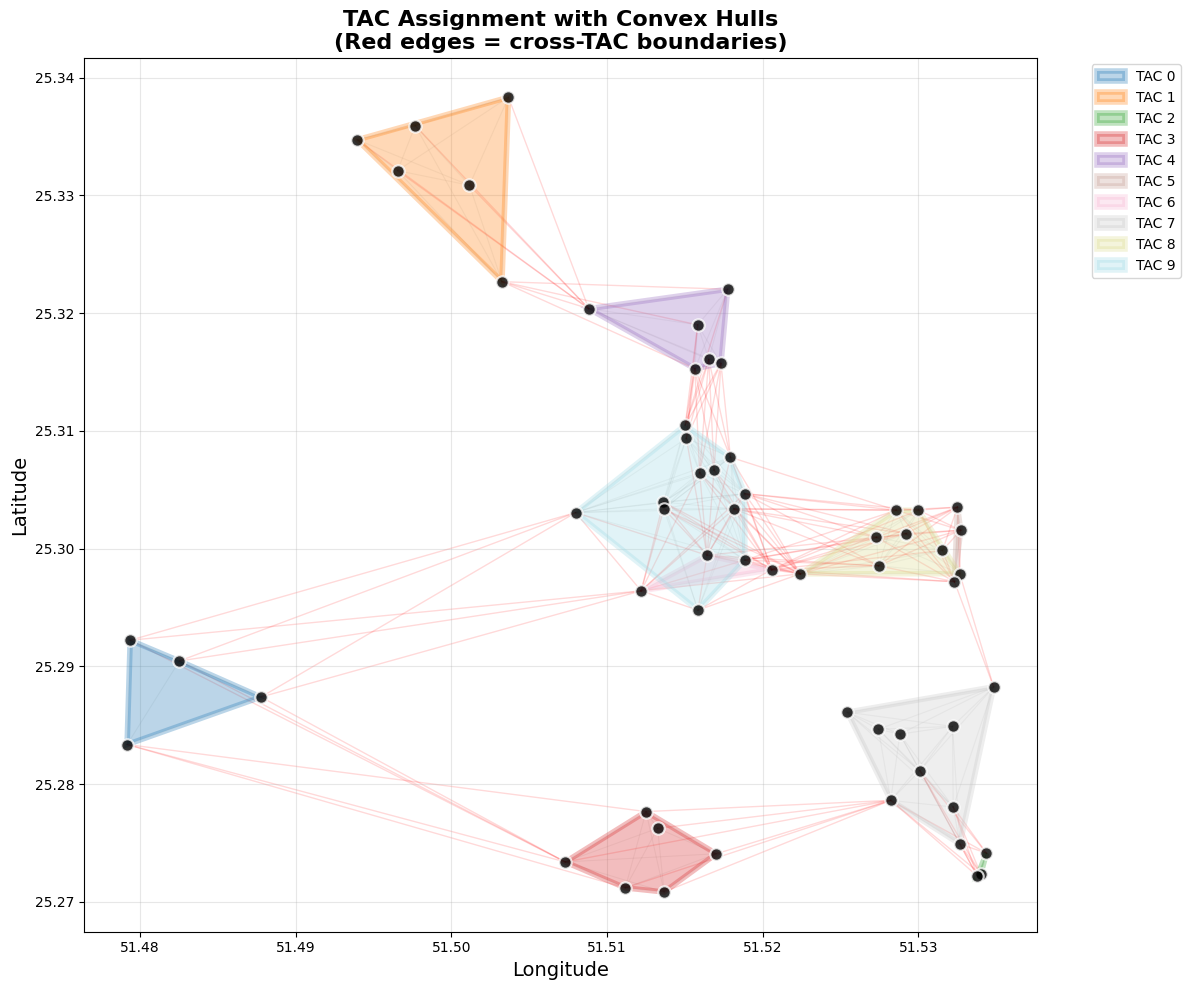

In [7]:
fig = data_loader.plot_tac_assignment(optimized_results)

In [8]:
report_kpis(data_loader, data_loader.assignment, optimized_results)


KPI REPORT

2. PAGING REDUCTION (Primary Goal: -15% to -20%)
   Baseline:    114.49
   Optimized:   115.76
   Change:      -1.11%
   Status:      ✗ Below target

3. TAU PROXY (Mobility)
   Baseline:    101.41
   Optimized:   101.11
   Change:      -0.30%

4. CONTIGUITY
   Total adjacency edges: 162
   Baseline split edges:  154 (95.1%)
   Optimized split edges: 147 (90.7%)
   Contiguity improvement: +4.3%

5. TAC SIZE STATISTICS
                    Baseline    Optimized
   Min                     2            3
   Max                    12           12
   Mean                  6.0          6.0
   Std Dev              2.83         2.83

   Constraints: [3, 12]
   Violations:  0/10

